In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import linear_model
from sklearn.svm import SVC
# from sklearn.crossvalidation import KFold
from sklearn.metrics import mean_squared_error, r2_score
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


In [ ]:
#Importing Model Metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold



In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mapping Column Names

In [ ]:
#depression
column_mapping_DEPRESSION={
    "DPQ010": "Little interest in doing things",
    "DPQ020": "Feeling down or depressed",
    "DPQ030": "Trouble sleeping",
    "DPQ040": "Feeling tired or low energy",
    "DPQ050": "Poor appetite or overeating",
    "DPQ060": "Negative self-perception",
    "DPQ070": "Trouble concentrating",
    "DPQ080": "Altered movement or speech",
    "DPQ090": "Thoughts of self-harm"}
#Blood Pressure
column_mapping_bp={



    "BPQ040A": "Prescription for hypertension",
    "BPQ080": "High cholesterol level",
    "BPQ090D": "Prescription for cholesterol",
    "BPQ100D": "Taking cholesterol medicine"
}

#Health
column_mapping_health_symtpmoms={

    "DIQ010": "Diagnosed with diabetes",
    "DIQ160": "Diagnosed with prediabetes",
    "DIQ170": "Told about health risk for diabetes",
    "DIQ172": "Feel at risk for diabetes",
    "DIQ175B": "Overweight",
    "DIQ175D": "Poor diet",
    "DIQ175F": "Had a baby weighed over 9 lbs. at birth",
    "DIQ175G": "Lack of physical activity",
    "DIQ175H": "High blood pressure",
    "DIQ175I": "High blood sugar",
    "DIQ175J": "High cholesterol",
    "DIQ175K": "Hypoglycemic",
    "DIQ175L": "Extreme hunger",
    "DIQ175M": "Tingling/numbness in hands or feet",
    "DIQ175N": "Blurred vision",
    "DIQ175O": "Increased fatigue",
    "DIQ175Q": "Doctor warning",
    "DIQ175S": "Gestational diabetes",
    "DIQ175T": "Frequent urination",
    "DIQ175U": "Thirst",
    "DIQ175V": "Craving for sweet/eating a lot of sugar",
    "SLD010H": "Hours of sleep per night",
    "SLQ050": "Told doctor about trouble sleeping",
    "SLQ060": "Told about sleep disorder",
    "BMXBMI": "BMI"


}




#Chronic_Diseases
chronic_disease = {
    "MCQ010": "asthma",
    "MCQ160B": "congestive_heart_failure",
    "MCQ160E": "heart_attack",
    "MCQ160M": "thyroid_problem",
    "MCQ160L": "liver_condition",
    "MCQ220": "cancer",
    "MCQ365A": "doctor_told_lose_weight",
    "MCQ365B": "doctor_told_exercise",
    "MCQ365C": "doctor_told_reduce_salt",
    "MCQ365D": "doctor_told_reduce_fat_calories",
    "KIQ022": "weak_failing_kidneys",
    "KIQ026": "kidney_stones"
}

smoking = {
    "SMQ020": "Smoked_100+_cigarettes",
    "SMQ040": "Currently_smoke_cigarettes",
    "SMD641": "Days_smoked_past_30_days",
    "ALQ101": "Had_12+_alcohol_drinks_per_year",
    "ALQ110": "Had_12+_alcohol_drinks_lifetime",
    "ALQ120U": "Days_drink_alcohol_per_week_month_year"
}

#Lab examinations
labs= {
    "LBDHDD": "Direct_HDL-Cholesterol (mg/dL)",
    "LBDVIDLC": "Vitamin_D",
    "LBDB12": "Vitamin_B12"
}

work_behavior={ "OCQ180": "Hours worked last week",
    "OCQ210": "Usually 35+ hours/week"}

physical_activity = {
    "PFQ020": "Crawl, walk limitations",
    "PFQ030": "Long term health problem",
    "PFQ049": "Limitations for working",
    "PFQ061B": "Walking 1/4 mile difficulty",
    "PFQ061C": "Walking up 10 steps difficulty",
    "PFQ061E": "Lifting or carrying difficulty",
    "PFQ061J": "Getting in/out of bed difficulty",
    "PFQ061Q": "Going out to events difficulty"
}

#Demographics

dem_columns = {
    "SEQN":"SEQN",
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age",
    "RIDRETH1": "Race",
    "DMDBORN4": "Country of Birth",
    "DMDEDUC2": "Education Level (Self)",
    "DMDEDUC3": "Education Level (Spouse)",
    "DMDFMSIZ": "Family Size",
    "DMDHHSIZ": "Household Size",
    "DMDHHSZA": "Children Aged 5 or Younger in Household",
    "DMDHHSZB": "Children Aged 6-17 in Household",
    "DMDHHSZE": "Adults Aged 60 or Older in Household",
    "DMDHREDU": "HH Reference Person's Education Level",
    "DMDHRGND": "HH Reference Person's Gender",
    "DMDHRMAR": "HH Reference Person's Marital Status",
    "DMDHSEDU": "HH Reference Person's Spouse's Education Level",
    "DMDMARTL": "Marital Status",
    "DMDYRSUS": "Length of Time in US",
    "FIALANG": "Family Interview Instrument Language",
    "INDFMPIR": "Ratio of Family Income to Poverty Guidelines",
    "INDHHIN2": "Annual  Household Income"
}


#Loading Data_set

In [ ]:
# Load from Google Drive
clean_df = pd.read_csv('/content/drive/My Drive/master_df_age_cleaned.csv')

In [ ]:
clean_df.drop(clean_df.columns[0], axis=1, inplace=True)


,Unnamed: 0,Little interest in doing things,Feeling down or depressed,Trouble sleeping,Feeling tired or low energy,Poor appetite or overeating,Negative self-perception,Trouble concentrating,Altered movement or speech,Thoughts of self-harm,...,Long term health problem,Limitations for working,Walking 1/4 mile difficulty,Walking up 10 steps difficulty,Lifting or carrying difficulty,Getting in/out of bed difficulty,Going out to events difficulty,dep_score,is_depressed,income_class
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0
3,4,2.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,2.0,4.0,2.0,2.0,9.0,0.0,2.0
4,5,3.0,3.0,3.0,3.0,3.0,1.0,2.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,1.0,1.0,19.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6108,10166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0
6109,10167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0
6110,10169,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
6111,10170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0


In [ ]:
clean_df.isnull().sum()

Unnamed: 0                          0
Little interest in doing things     0
Feeling down or depressed           0
Trouble sleeping                    0
Feeling tired or low energy         0
                                   ..
Lifting or carrying difficulty      0
Getting in/out of bed difficulty    0
Going out to events difficulty      0
dep_score                           0
is_depressed                        0
Length: 73, dtype: int64

In [ ]:
clean_df = clean_df.drop(clean_df.columns[0], axis=1)

In [ ]:
clean_df['Annual  Household Income'].describe()

count    6113.000000
mean        1.656277
std         0.646657
min         1.000000
25%         1.000000
50%         1.656277
75%         2.000000
max         3.000000
Name: Annual  Household Income, dtype: float64

<Axes: xlabel='Ratio of Family Income to Poverty Guidelines', ylabel='Count'>

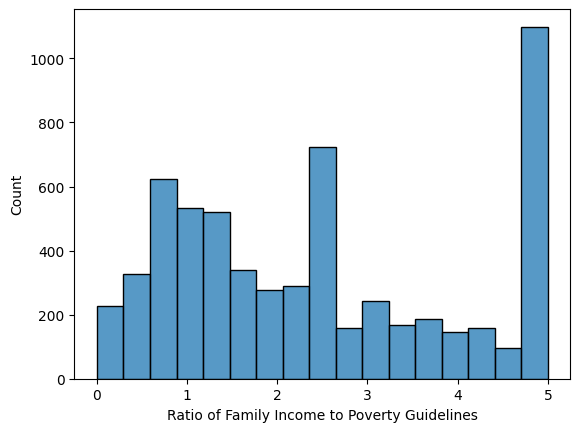

In [ ]:
sns.histplot(clean_df,x='Ratio of Family Income to Poverty Guidelines')

In [ ]:
clean_df.columns

Index(['Little interest in doing things', 'Feeling down or depressed',
       'Trouble sleeping', 'Feeling tired or low energy',
       'Poor appetite or overeating', 'Negative self-perception',
       'Trouble concentrating', 'Altered movement or speech',
       'Thoughts of self-harm', 'SEQN', 'Gender', 'Age', 'Race',
       'Country of Birth', 'Education Level (Self)',
       'Education Level (Spouse)', 'Family Size', 'Household Size',
       'Children Aged 5 or Younger in Household',
       'Children Aged 6-17 in Household',
       'Adults Aged 60 or Older in Household',
       'HH Reference Person's Education Level', 'HH Reference Person's Gender',
       'HH Reference Person's Marital Status',
       'HH Reference Person's Spouse's Education Level', 'Marital Status',
       'Length of Time in US', 'Family Interview Instrument Language',
       'Ratio of Family Income to Poverty Guidelines',
       'Annual  Household Income', 'Prescription for hypertension',
       'High cholester

#Model Development

In [ ]:
clean_df.groupby('Annual  Household Income')['Household Size'].count()

Annual  Household Income
1.000000    2367
1.656277    1397
2.000000    1603
3.000000     746
Name: Household Size, dtype: int64

#Subsetting Income Groups

In [ ]:
clean_df['income_class'] = np.nan
clean_df.loc[(clean_df['Annual  Household Income'] <= 1.0) & (clean_df['Ratio of Family Income to Poverty Guidelines'] <= 1), 'income_class'] = 1
clean_df.loc[(clean_df['Annual  Household Income'] <= 2.0) & (clean_df['Annual  Household Income']> 1), 'income_class'] = 2
clean_df.loc[(clean_df['Annual  Household Income'] <= 3.0) & (clean_df['Annual  Household Income']> 2), 'income_class'] = 3


In [ ]:
#Low-Income Model

low_df=clean_df[clean_df['income_class']==1]
print('low', low_df.shape)

#Med-Income Model

med_df=clean_df[clean_df['income_class']==2]
print('med', med_df.shape)

#High-Income Model

high_df=clean_df[clean_df['income_class']==3]
print('high', high_df.shape)

low (1250, 73)
med (3000, 73)
high (746, 73)


In [ ]:
clean_df.groupby(['income_class','is_depressed'])['Age'].count()

income_class  is_depressed
1.0           0.0             1095
              1.0              155
2.0           0.0             2800
              1.0              200
3.0           0.0              713
              1.0               33
Name: Age, dtype: int64

<ipython-input-8-a56a2ea75126>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(income_order, fontsize=10)


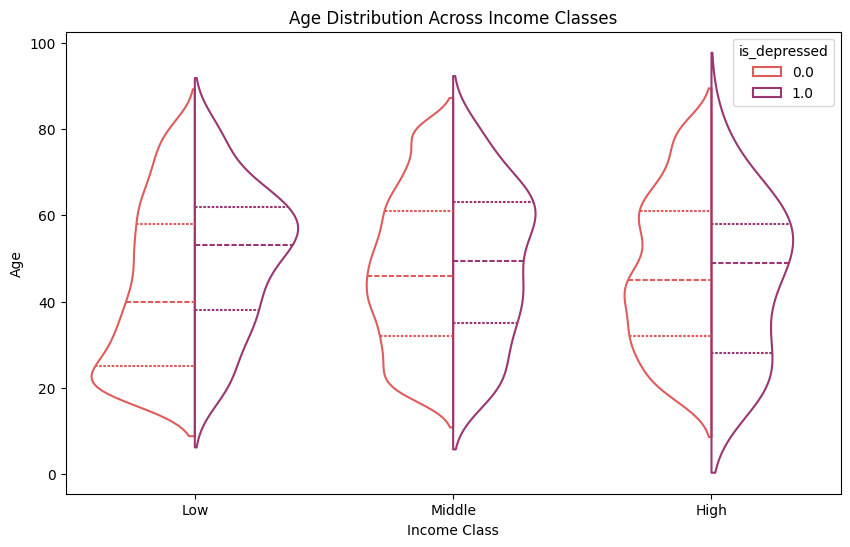

In [ ]:

plt.figure(figsize=(10, 6))
# Define the order of the income classes
income_order = ['Low', 'Middle', 'High']

# Create the swarm plot with custom x-labels
g = sns.violinplot(data=clean_df, x='income_class', y='Age', palette="flare", hue='is_depressed', split=True, inner="quart", fill=False)

# Set the x-label
g.set_xticklabels(income_order, fontsize=10)
g.set_xlabel('Income Class')
g.set_title('Age Distribution Across Income Classes')

plt.show()


In [ ]:
clean_df.drop(clean_df.columns[0], axis=1, inplace=True)


In [ ]:
clean_df['income_class'].value_counts()

2.0    3000
1.0    1250
3.0     746
Name: income_class, dtype: int64

#Low-Income

In [ ]:
#Define Data Variables
#removing depression_colums
depression_columns=list(column_mapping_DEPRESSION.values())+ ['dep_score','is_depressed']
income_columns=['Annual  Household Income']
all_cols=depression_columns+['SEQN']+income_columns
X=low_df.drop(columns=all_cols)

y=low_df['is_depressed']

In [ ]:
# Shuffle your data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)



(1000, 60)
(1000,)


In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(X_train, X_test):
    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test


X_train, X_test=preprocess_data(X_train, X_test)

In [ ]:
# Resample the training set using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.shape

(1752,)

In [ ]:
X_train_resampled.shape

(1752, 61)

In [ ]:
X_train.shape

(1000, 61)

In [ ]:
# Fit XGBoost classifier on the resampled and selected features data
xgb_low = XGBClassifier(objective='binary:logistic', eval_metric='aucpr',random_state=42)
xgb_low.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_low.predict(X_test)

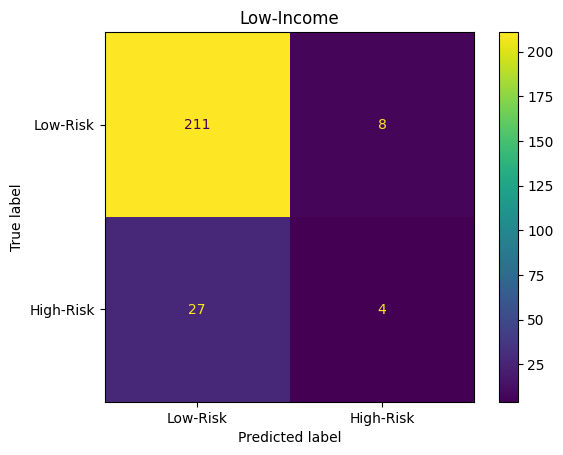

Accuracy: 0.86


In [ ]:
from sklearn import metrics

# Assuming y_test contains the actual values
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Low-Risk','High-Risk'])

# Label the confusion matrix

cm_display.plot()
plt.grid(False)
plt.title('Low-Income')
plt.show()

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming y_test contains the actual values and y_pred contains the predicted values

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate specificity
specificity = recall_score(y_test, y_pred, pos_label=0)
print("Specificity:", specificity)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
Precision: 0.3333333333333333
Recall (Sensitivity): 0.12903225806451613
Specificity: 0.9634703196347032
F1 Score: 0.18604651162790697

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92       219
         1.0       0.33      0.13      0.19        31

    accuracy                           0.86       250
   macro avg       0.61      0.55      0.55       250
weighted avg       0.82      0.86      0.83       250



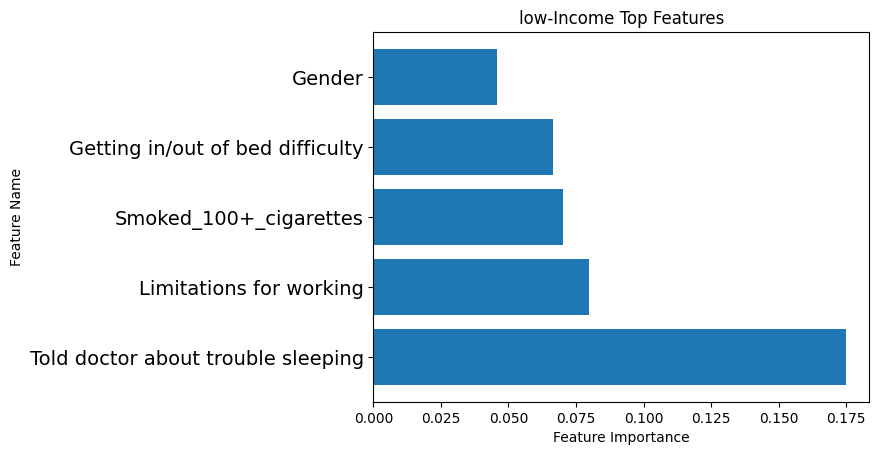

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Calculate feature importance
feature_importance_low = xgb_low.feature_importances_
feature_names = X.columns

# Plot feature importance for the top 5 features
top_features_low = feature_importance_low.argsort()[-5:][::-1]
plt.barh(feature_names[top_features_low], feature_importance_low[top_features_low])

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('low-Income Top Features')
plt.yticks(fontsize=14)
# Turn off the grid lines
plt.grid(False)
plt.show()




set_1=feature_names[top_features_low]


In [ ]:
set_1

Index(['Told doctor about trouble sleeping', 'Limitations for working',
       'Smoked_100+_cigarettes', 'Getting in/out of bed difficulty', 'Gender'],
      dtype='object')

In [ ]:
from sklearn.model_selection import cross_val_score
# Evaluate the model performance using 5-fold cross-validation
cv_scores = cross_val_score(xgb_low, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
acc_scores = cross_val_score(xgb_low, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print('Cross-Validation ROC-AUC Scores: ', cv_scores)
print('Mean Cross-Validation ROC-AUC Score: ', cv_scores.mean())

Cross-Validation ROC-AUC Scores:  [0.93659091 0.99883117 0.99980408 0.99967347 0.99954286]
Mean Cross-Validation ROC-AUC Score:  0.9868884972170686


In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.1 MB/s eta 0:00:00


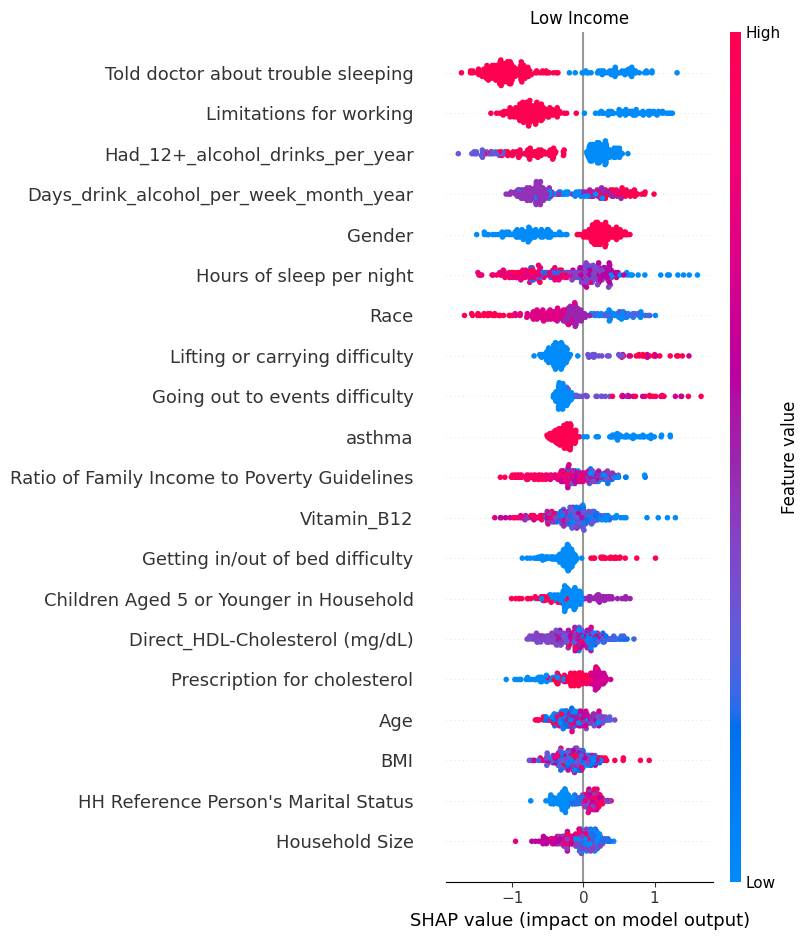

In [ ]:
#General Model
# Create the explainer
explainer = shap.TreeExplainer(xgb_low)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)
plt.title('Low Income')
# Plot the SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, feature_names=feature_names)
plt.show()


#Med_Income

In [ ]:
#Define Data Variables
#removing depression_colums

X=med_df.drop(columns=all_cols)

y=med_df['is_depressed']

In [ ]:
# Shuffle your data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)



(2400, 60)
(2400,)


In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(X_train, X_test):
    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test


X_train, X_test=preprocess_data(X_train, X_test)

In [ ]:
# Resample the training set using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.shape

(4474,)

In [ ]:
y_train.value_counts()
y_train_resampled.value_counts()

0.0    2237
1.0    2237
Name: is_depressed, dtype: int64

In [ ]:
X_train_resampled.shape

(4474, 60)

In [ ]:
X_train.shape

(2400, 60)

In [ ]:
# Fit XGBoost classifier on the resampled and selected features data
xgb = XGBClassifier(objective='binary:logistic', eval_metric='aucpr',random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


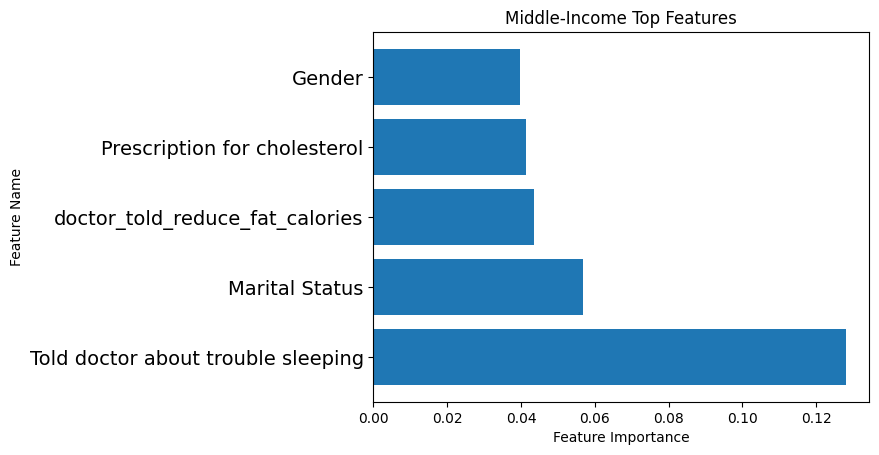

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Calculate feature importance
feature_importance_med = xgb.feature_importances_
feature_names = X.columns

# Plot feature importance for the top 5 features
top_features_med = feature_importance_med.argsort()[-5:][::-1]
plt.barh(feature_names[top_features_med], feature_importance_med[top_features_med])

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Middle-Income Top Features')
plt.yticks(fontsize=14)
# Turn off the grid lines
plt.grid(False)
plt.show()

set_2=feature_names[top_features_med]



In [ ]:
from sklearn.model_selection import cross_val_score
# Evaluate the model performance using 5-fold cross-validation
cv_scores = cross_val_score(xgb, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
acc_scores = cross_val_score(xgb, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print('Cross-Validation ROC-AUC Scores: ', cv_scores)
print('Mean Cross-Validation ROC-AUC Score: ', cv_scores.mean())

Cross-Validation ROC-AUC Scores:  [0.97047279 0.99996005 0.99998502 1.         1.        ]
Mean Cross-Validation ROC-AUC Score:  0.994083573026526


[20:14:23] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


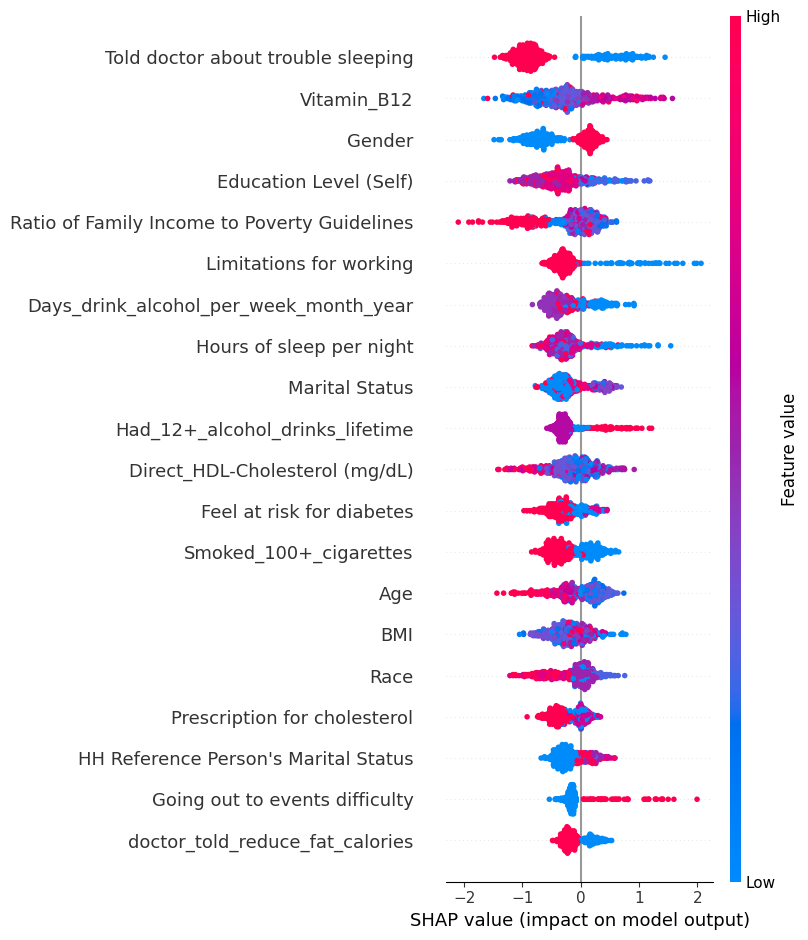

In [ ]:
#General Model
# Create the explainer
explainer = shap.TreeExplainer(xgb)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


#High_Income

In [ ]:
#Define Data Variables
#removing depression_colums

X=high_df.drop(columns=all_cols)

y=high_df['is_depressed']

In [ ]:
# Shuffle your data
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)



(596, 60)
(596,)


In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(X_train, X_test):
    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test


X_train, X_test=preprocess_data(X_train, X_test)

In [ ]:
# Resample the training set using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.shape

(1144,)

In [ ]:
y_train.value_counts()
y_train_resampled.value_counts()

0.0    572
1.0    572
Name: is_depressed, dtype: int64

In [ ]:
# # Select the most important features using SelectFromModel
# selector = SelectFromModel(estimator=RandomForestClassifier(random_state=42))
# X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
# X_test_selected = selector.transform(X_test)

In [ ]:
X_train_resampled.shape

(1144, 60)

In [ ]:
X_train.shape

(596, 60)

In [ ]:
# Fit XGBoost classifier on the resampled and selected features data
xgb = XGBClassifier(objective='binary:logistic', eval_metric='aucpr',random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9266666666666666


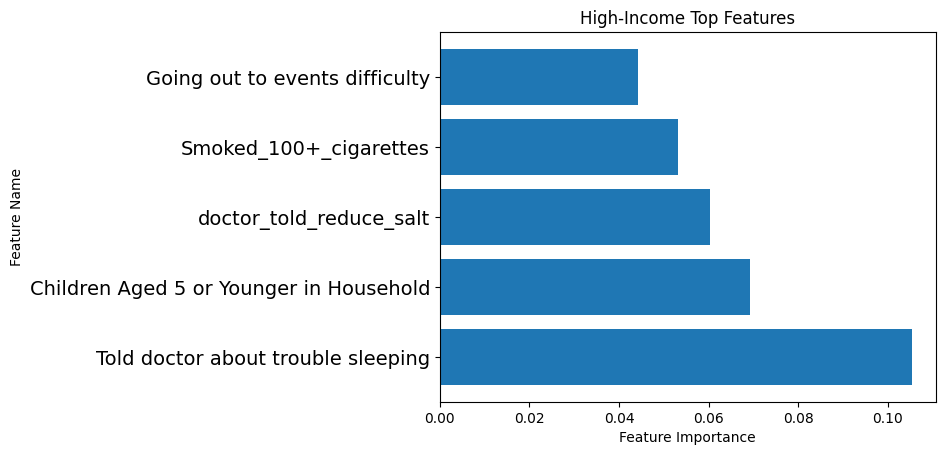

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Calculate feature importance
feature_importance_high = xgb.feature_importances_
feature_names = X.columns

# Plot feature importance for the top 5 features
top_features_high = feature_importance_high.argsort()[-5:][::-1]
plt.barh(feature_names[top_features_high], feature_importance_high[top_features_high])

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('High-Income Top Features')
plt.yticks(fontsize=14)
# Turn off the grid lines
plt.grid(False)
plt.show()

set_3=feature_names[top_features_high]


In [ ]:
set_3

Index(['Told doctor about trouble sleeping',
       'Children Aged 5 or Younger in Household', 'doctor_told_reduce_salt',
       'Smoked_100+_cigarettes', 'Going out to events difficulty'],
      dtype='object')

In [ ]:
from sklearn.model_selection import cross_val_score
# Evaluate the model performance using 5-fold cross-validation
cv_scores = cross_val_score(xgb, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')
acc_scores = cross_val_score(xgb, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print('Cross-Validation ROC-AUC Scores: ', cv_scores)
print('Mean Cross-Validation ROC-AUC Score: ', cv_scores.mean())

Cross-Validation ROC-AUC Scores:  [0.9928299  0.99992372 1.         1.         1.        ]
Mean Cross-Validation ROC-AUC Score:  0.9985507246376812


In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.1 MB/s eta 0:00:00


[12:01:19] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


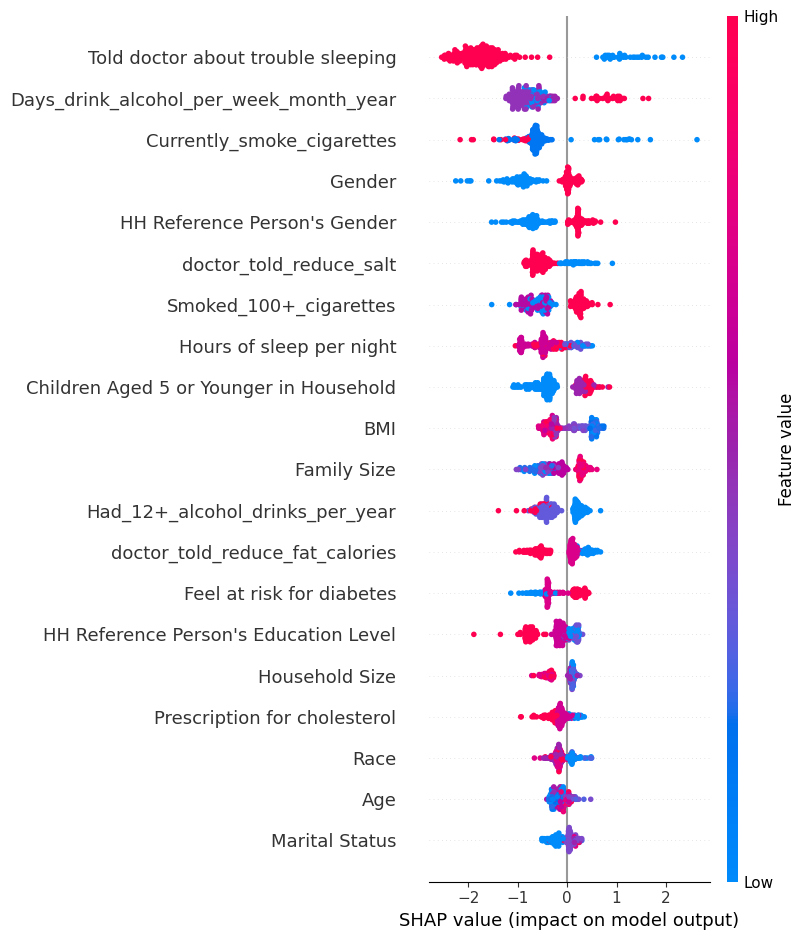

In [ ]:
#General Model
# Create the explainer
explainer = shap.TreeExplainer(xgb)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


In [ ]:
!pip install matplotlib-venn


In [ ]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(X_train, X_test):
    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test




In [ ]:
#removing depression_colums
depression_columns=list(column_mapping_DEPRESSION.values())+ ['dep_score','is_depressed']
income_columns=['Annual  Household Income']
all_cols=depression_columns+['SEQN']+income_columns

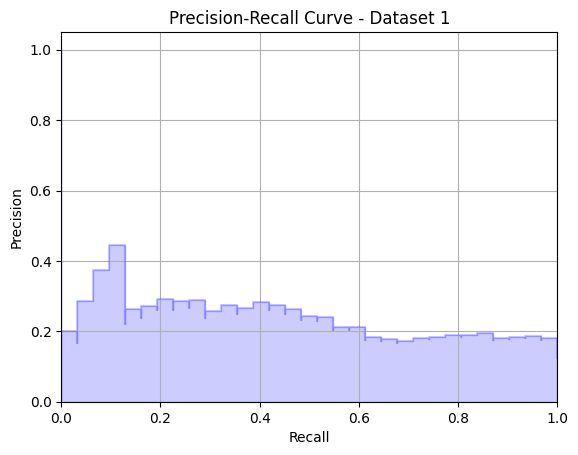

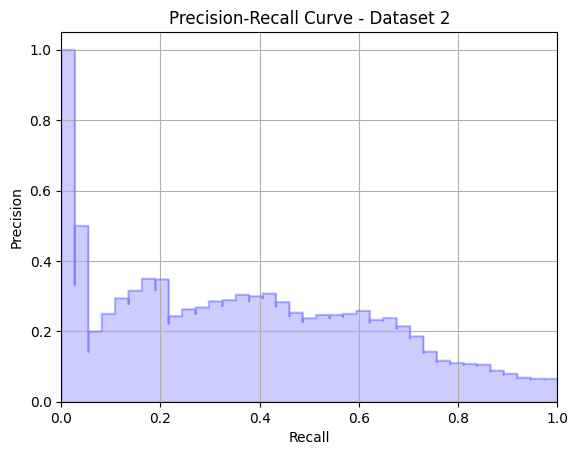

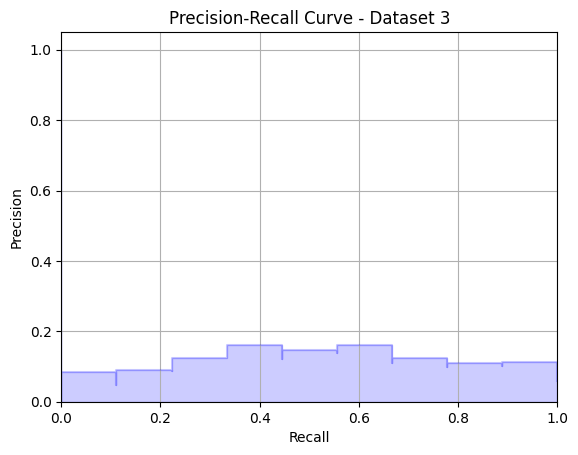

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
# Define a list of dataframes
dataframes = [low_df, med_df, high_df]

# Create a loop to process each dataset
for i, dataset in enumerate(dataframes):

    X=dataset.drop(columns=all_cols)
    y=dataset['is_depressed']

    # Split the dataset into training and testing sets (you can customize this)
    # Shuffle your data
    X, y = shuffle(X, y, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_test=preprocess_data(X_train, X_test)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Create and train an XGBoost classifier
    model = XGBClassifier(objective='binary:logistic', eval_metric='aucpr',random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities on the test data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate precision-recall curve values
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

    # Plot the precision-recall curve for the current dataset
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - Dataset {i+1}')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.grid(True)

    # Show the plot
    plt.show()


# ROC_AUC Curves

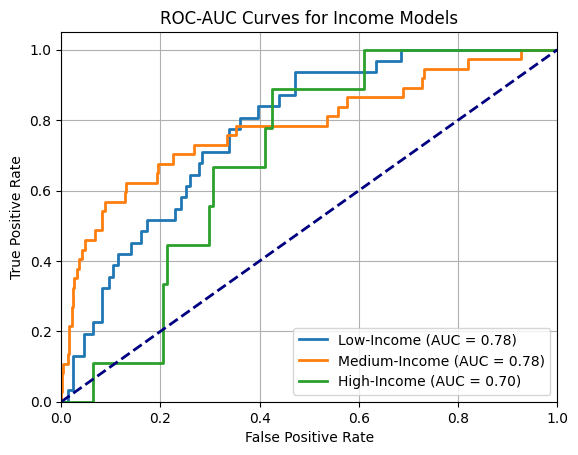

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

# Define a list of dataframes
dataframes = [low_df, med_df, high_df]

# Initialize lists to store ROC curve data
all_fpr = []
all_tpr = []
all_roc_auc = []
names=['Low-Income', 'Medium-Income','High-Income']
# Create a loop to process each dataset
for i, dataset in enumerate(dataframes):
    X = dataset.drop(columns=all_cols)
    y = dataset['is_depressed']

    # Shuffle your data
    X, y = shuffle(X, y, random_state=42)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocess the data
    X_train, X_test = preprocess_data(X_train, X_test)

    # Resample the training set using SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Create and train an XGBoost classifier
    model = XGBClassifier(objective='binary:logistic', eval_metric='auc', random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities on the test data
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve values
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Calculate the ROC-AUC score
    roc_auc = auc(fpr, tpr)

    # Append ROC curve data to lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_roc_auc.append(roc_auc)

# Plot all ROC-AUC curves on a single graph
plt.figure()

for i, dataset in enumerate(dataframes):
    plt.plot(all_fpr[i], all_tpr[i], lw=2, label=f'{names[i]} (AUC = {all_roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Income Models')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)

# Show the plot
plt.show()
